In [1]:
using Base.Iterators
using ChainRulesCore
using LinearAlgebra
using Match
using MLDatasets
using PrettyPrint
using PyPlot
using Random
using Serialization
using Tao
using Zygote
using Flux

┌ Info: Precompiling Tao [570b2322-4165-4d3e-aeff-9f78c1c9f963]
└ @ Base loading.jl:1423
┌ Warning: Package Tao does not have UUIDs in its dependencies:
│ - If you have Tao checked out for development and have
│   added UUIDs as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Tao
└ Loading UUIDs into Tao from project dependency, future warnings for Tao are suppressed.


In [2]:
function one_hot(T, i::U, n::Int64) where {U}
    v = zeros(T, n)
    v[Int64(i)] = T(1)
    return v
end

one_hot (generic function with 1 method)

In [3]:
T = Float32
X, Y = MNIST.traindata(T)
Y = mapreduce(y -> one_hot(T, y+1, 10), hcat, Y)

10×60000 Matrix{Float32}:
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0     0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  1.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [4]:
F = open(deserialize, "model_200.jls")
θ = open(deserialize, "params_200.jls")

ParameterContainer(OrderedCollections.OrderedDict{Any, Vector{<:Type}}(UUID("0b793159-d274-425a-aef0-3db478324626") => DataType[Float32], UUID("856e446e-0c6a-472a-9638-f7b8557cd282") => DataType[Float32], UUID("e410a059-02f5-4b45-b0df-42ece728d69f") => DataType[Float32]), OrderedCollections.OrderedDict{Any, Vector{UnitRange{Int64}}}(UUID("0b793159-d274-425a-aef0-3db478324626") => UnitRange{Int64}[1:320], UUID("856e446e-0c6a-472a-9638-f7b8557cd282") => UnitRange{Int64}[321:25408], UUID("e410a059-02f5-4b45-b0df-42ece728d69f") => UnitRange{Int64}[25409:25440]), OrderedCollections.OrderedDict{Any, Vector{Union{Tuple{Vararg{Int64}}, Vector{Int64}}}}(UUID("0b793159-d274-425a-aef0-3db478324626") => Union{Tuple{Vararg{Int64}}, Vector{Int64}}[(10, 32)], UUID("856e446e-0c6a-472a-9638-f7b8557cd282") => Union{Tuple{Vararg{Int64}}, Vector{Int64}}[(32, 784)], UUID("e410a059-02f5-4b45-b0df-42ece728d69f") => Union{Tuple{Vararg{Int64}}, Vector{Int64}}[(32,)]), OrderedCollections.OrderedDict{Type{<:Numb

y = Float32[3.0562336f-7, 0.00030607593, 9.808371f-5, 5.6017998f-5, 3.456994f-8, 0.0010074455, 9.103138f-8, 9.606481f-6, 0.9984804, 4.198396f-5]
pred = 8


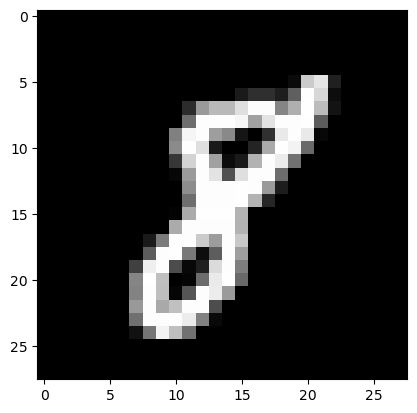

In [5]:
x = X[:,:,18]
y = (F(vec(x), θ))
imshow(transpose(x), cmap="gray")
(_, digit) = findmax(y)
@show y
println("pred = $(digit-1)")